# Select a subset of participants

Data on participants consists of the following:

### Ranges
* Age
* Name
* Yrs Loan Taken

### Categories
* Ethnicity
* Income
* Employment
* Education
* State

### Binary
* Completed Degree
* Hispanic/Latino
* Currently Have Student Loan
* Primary Person Making Repayment
* Loan Balance <32K
* Ever Missed a Payment
* Having Difficulty Making Payments

Some data is missing from the original pdf tables this spreadsheet was created from. In cases where data is missing, the value is "?"

## Imports and Data

In [1]:
import numpy as np
import pandas as pd
import qgrid

participants_df = pd.read_excel('Participants.xlsx', header=None , names = ['Name', 
    'PID', 'State', 'Gender', 'Age', 'Education', 'Completed Degree', 'Employment', 'Income', 'Ethnicity',
    'Hispanic/Latino', 'Currently Have Student Loan', 'Primary Person Making Repayment', 
    'Loan balance <$32K', 'Year Loan Taken', 'Ever Missed a Payment', 'Having Difficulty Making Payments'])

answers_df = pd.read_excel('Answers_Edited_530.xlsx', sheet_name = "Answers" , names = ['PID', 'TQID', 'AID', 'Answer', 'Code'] )

## QGrid for Filtering Data by Participants

Use the table below to select a subset of participants which you can then run subsequent analysis on. Click the filter on a given column's header to select ranges or specific values for each column

In [2]:
participants_qgrid = qgrid.show_grid(participants_df, show_toolbar=True)
participants_qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Generate Dataframe Filtered by Participant

The code below will generate a new dataframe based on the filters selected in the cell above. This dataframe will allow users to identify the set of answers data from the Answers.xlsx spreadsheet corresponding to selected participants.

In [3]:
participants_filtered_df = participants_qgrid.get_changed_df()
participants_filtered_df

,Name,PID,State,Gender,Age,Education,Completed Degree,Employment,Income,Ethnicity,Hispanic/Latino,Currently Have Student Loan,Primary Person Making Repayment,Loan balance <$32K,Year Loan Taken,Ever Missed a Payment,Having Difficulty Making Payments
0,Aliana,1,california,F,31,technical degree,yes,Full Time,$50-99K,-,Yes,Yes,Yes,No,2012,Yes,Yes
9,Paz,10,california,M,40,associate degree,no,Full Time,$50-99K,-,Yes,Yes,Yes,Yes,2009,No,No
12,Jessica,13,Missouri,F,35,some college,no,No,<$30K,Hispanic,Yes,?,?,Yes,2011,Yes,No
20,Luis,21,Pennsylvania,M,50,associate degree,yes,Part Time,$30-49K,Caucasian,Yes,?,?,No,2007,Yes,Yes
21,Nilsa,22,Pennsylvania,F,49,technical degree,no,Self Employed,$30-49K,Caucasian,Yes,?,?,Yes,2010,Yes,No


Create an object `qgrid_pids` which lists the selects PIDs and is then passed to locate values in Answers.xlsx

In [4]:
qgrid_pids = participants_filtered_df['PID'].values

In [5]:
specific_participants_answers_df = answers_df.loc[answers_df['PID'].isin(qgrid_pids)]

## QGrid for Filtering Answers Data by TQID, Code

This grid allows us to apply new filters to the Answers.xlsx dataset. Previously, we have selected specific participants from the database using a variety of filters. Now, with the dataset which only includes those participants we selected, we can filter the TQID, code, or combination of those which we are interested in viewing summary statistics and other data visualizations on.

In [7]:
answers_qgrid = qgrid.show_grid(specific_participants_answers_df, show_toolbar=True)
answers_qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Generate Dataframe Filtered by TQID and Code

The following cell will generate a dataframe based on the filters which have been applied in the TQID and Code fields.

In [10]:
answers_filtered_df = answers_qgrid.get_changed_df()
answers_filtered_df

,PID,TQID,AID,Answer,Code
34,1,T2Q1,1,So that I could get a more definite,preference for options
35,1,T2Q1,2,", like an amount of whatever I would have to a...",preference for options
36,1,T2Q1,3,"Also, like the due date, it doesn't have any...",preference for options
37,1,T2Q10,1,What do you mean?,lack of understanding
38,1,T2Q10,2,"Oh, it was just saying if I was able to make a...",content
39,1,T2Q10,3,"... yeah, it's not telling me what my payment...",judgment of clarity of document
40,1,T2Q10,4,and if I could make a payment I still wouldn'...,lack of understanding
41,1,T2Q10,5,"I would assume online if they have that,",lack of understanding
42,1,T2Q10,6,or I would have to call.,action: call loan servicer
3350,10,T2Q10,1,"Yeah, here-",lack of understanding


TODO: Make a cell which displays the filters that have been applied for double checking

In [17]:
import nltk

answers_filtered_df['tokens'] = answers_filtered_df.apply(lambda row: nltk.word_tokenize(row['Answer']), axis=1)

In [18]:
answers_filtered_df.head()

,PID,TQID,AID,Answer,Code,tokens
34,1,T2Q1,1,So that I could get a more definite,preference for options,"[So, that, I, could, get, a, more, definite]"
35,1,T2Q1,2,", like an amount of whatever I would have to a...",preference for options,"[,, like, an, amount, of, whatever, I, would, ..."
36,1,T2Q1,3,"Also, like the due date, it doesn't have any...",preference for options,"[Also, ,, like, the, due, date, ,, it, does, n..."
37,1,T2Q10,1,What do you mean?,lack of understanding,"[What, do, you, mean, ?]"
38,1,T2Q10,2,"Oh, it was just saying if I was able to make a...",content,"[Oh, ,, it, was, just, saying, if, I, was, abl..."


In [25]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords


answers_list = list(answers_filtered_df['tokens'])
flat_answers_list = [item for sublist in answers_list for item in sublist]
flat_answers_list
answers_fd = FreqDist(flat_answers_list)

In [27]:
answer_bigrams = nltk.bigrams(flat_answers_list)

TODO: Make the below code count bigrams rather than simply list them all

In [28]:
list(answer_bigrams)

[('So', 'that'),
 ('that', 'I'),
 ('I', 'could'),
 ('could', 'get'),
 ('get', 'a'),
 ('a', 'more'),
 ('more', 'definite'),
 ('definite', ','),
 (',', 'like'),
 ('like', 'an'),
 ('an', 'amount'),
 ('amount', 'of'),
 ('of', 'whatever'),
 ('whatever', 'I'),
 ('I', 'would'),
 ('would', 'have'),
 ('have', 'to'),
 ('to', 'actually'),
 ('actually', 'pay'),
 ('pay', 'monthly'),
 ('monthly', '.'),
 ('.', 'Also'),
 ('Also', ','),
 (',', 'like'),
 ('like', 'the'),
 ('the', 'due'),
 ('due', 'date'),
 ('date', ','),
 (',', 'it'),
 ('it', 'does'),
 ('does', "n't"),
 ("n't", 'have'),
 ('have', 'any'),
 ('any', 'dates'),
 ('dates', '.'),
 ('.', 'What'),
 ('What', 'do'),
 ('do', 'you'),
 ('you', 'mean'),
 ('mean', '?'),
 ('?', 'Oh'),
 ('Oh', ','),
 (',', 'it'),
 ('it', 'was'),
 ('was', 'just'),
 ('just', 'saying'),
 ('saying', 'if'),
 ('if', 'I'),
 ('I', 'was'),
 ('was', 'able'),
 ('able', 'to'),
 ('to', 'make'),
 ('make', 'a'),
 ('a', 'payment'),
 ('payment', 'before'),
 ('before', '...'),
 ('...', 'y

TODO: Make the charts below display relevant information and give some interactive options for the user

<IPython.core.display.Javascript object>


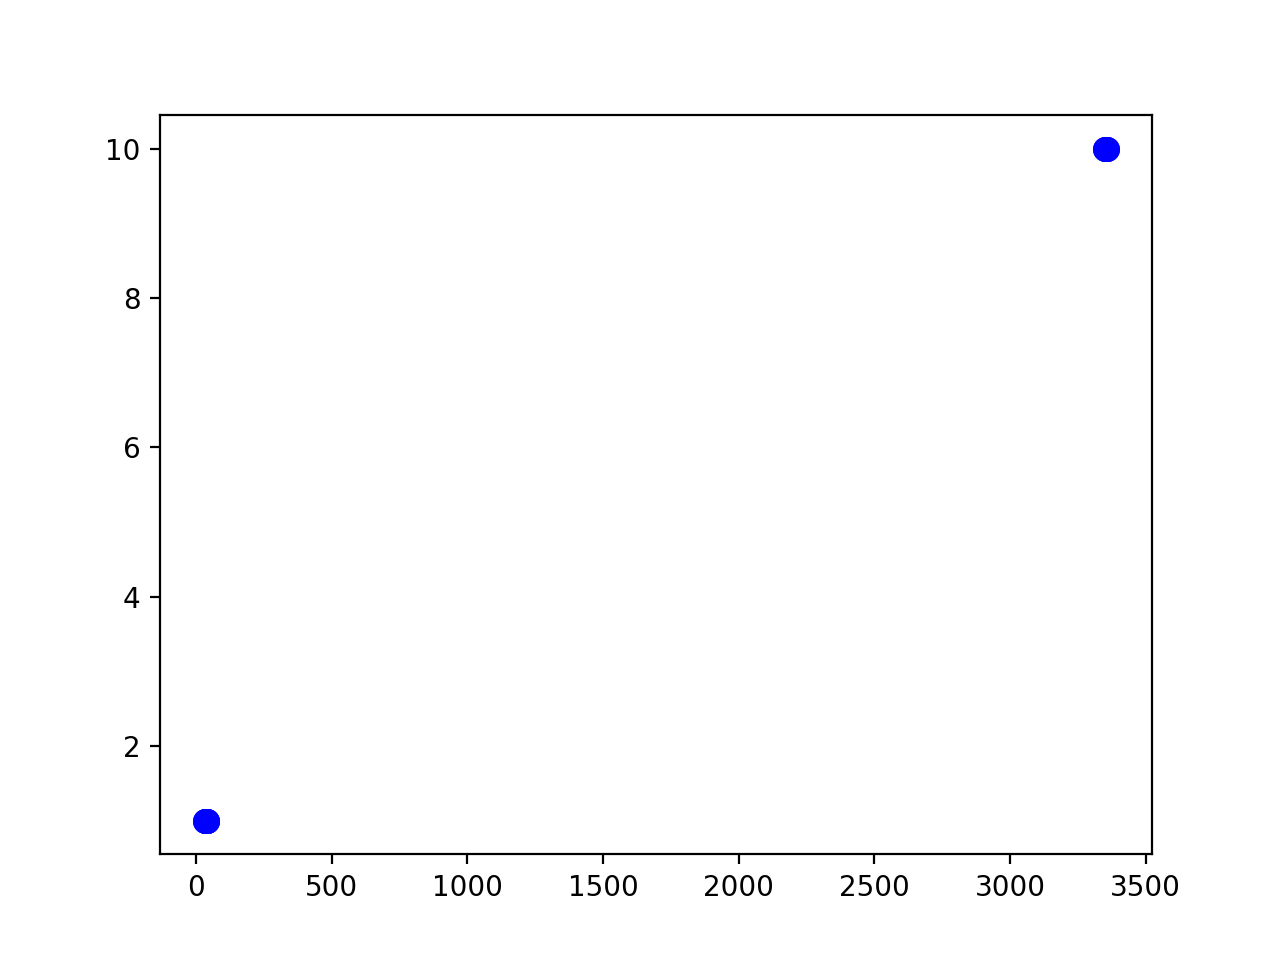

In [29]:
%matplotlib nbagg
import matplotlib.pyplot as plt


answers_filtered_df = answers_qgrid.get_changed_df()
x = answers_filtered_df.index
y = answers_filtered_df['PID']


fig, ax = plt.subplots()
scatter, = ax.plot(x,y,ms=8,color='b',marker='o',ls='')

def handle_filter_changed(event, widget):
    answers_filtered_df = answers_qgrid.get_changed_df()
    x = answers_filtered_df.index
    y = answers_filtered_df['PID']
    fig.canvas.draw()
    scatter.set_data(x, y)
    fig.canvas.draw()

answers_qgrid.on('filter_changed', handle_filter_changed)


x = answers_filtered_df.index
y = answers_filtered_df['PID']

In [14]:
answers_qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…